# Your name: Max Kaiser 
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [112]:
# import packages 

import pandas as pd 
import numpy as np
import datetime 
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Data File Reading Section
## Write code to read in data from external sources here

In [113]:
#read datasets

df = pd.read_csv('data.csv',na_values=['NA'],encoding='latin1') # identifies NA as missing values 
# and fixed the encoding issue 


#Question: 
 #  https://www.kaggle.com/shrutibhargava94/india-air-quality-data
 # import from external? (file path)

/Users/maxkaiser/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [114]:
#Q1
df.describe().round(1)

,so2,no2,rspm,spm,pm2_5
count,401096.0,419509.0,395520.0,198355.0,9314.0
mean,10.8,25.8,108.8,220.8,40.8
std,11.2,18.5,74.9,151.4,30.8
min,0.0,0.0,0.0,0.0,3.0
25%,5.0,14.0,56.0,111.0,24.0
50%,8.0,22.0,90.0,187.0,32.0
75%,13.7,32.2,142.0,296.0,46.0
max,909.0,876.0,6307.0,3380.0,504.0


In [115]:
#Q2
df.shape

# 13 columns 
# 435742 rows 

(435742, 13)

In [116]:
#Q3
df.count()

stn_code                       291665
sampling_date                  435739
state                          435742
location                       435739
agency                         286261
type                           430349
so2                            401096
no2                            419509
rspm                           395520
spm                            198355
location_monitoring_station    408251
pm2_5                            9314
date                           435735
dtype: int64

In [117]:
#Q4 

df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [118]:
#Q5 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [119]:
#Q6 Top 10 

df.head(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
5,152,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,1990-03-01
6,150,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,1990-04-01
7,151,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,1990-04-01
8,152,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,1990-04-01
9,151,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,1990-05-01


In [120]:
#Q6 Bottom 10 

df.tail(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435732,SAMP,09-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,145.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-09
435733,SAMP,12-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,34.0,61.0,161.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-12
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-15
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-18
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-21
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [121]:
#1 # Cleaning up the data

#dropping columns that aren't required

#using list of column names

df.drop(['stn_code','agency','sampling_date','location_monitoring_station'],axis=1,inplace=True)


In [122]:
#2 Dropping rows where no date is available

#use subset--> dropping rows with list of columns to include

df.dropna(subset=['date'],inplace=True)

In [123]:
# displaying final columns (data.columns)

df.columns

# 9 columns left 

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [124]:
types = { "Residential": "R", "Residential and others": "RO", "Residential, Rural and other Areas": "RRO", "Industrial Area": "I", "Industrial Areas": "I", "Industrial": "I", "Sensitive Area": "S", "Sensitive Areas": "S", "Sensitive": "S", np.nan: "RRO" }

df.type= df.type.replace(types)


In [125]:
# Display top 10 records after codification of 'types'

df.head(10) # check/see changes in type column 


,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01
5,Andhra Pradesh,Hyderabad,RRO,6.4,25.7,NaN,NaN,NaN,1990-03-01
6,Andhra Pradesh,Hyderabad,RRO,5.4,17.1,NaN,NaN,NaN,1990-04-01
7,Andhra Pradesh,Hyderabad,I,4.7,8.7,NaN,NaN,NaN,1990-04-01
8,Andhra Pradesh,Hyderabad,RRO,4.2,23.0,NaN,NaN,NaN,1990-04-01
9,Andhra Pradesh,Hyderabad,I,4.0,8.9,NaN,NaN,NaN,1990-05-01


### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [126]:
# chnaging column type to datetime and storing it 

df['date'] = pd.to_datetime(df.date)

#df.info() # check if changed 

#extract year from datetime object 

#creating new column year 

df['year'] = df.date.dt.year

# df.year to see some values 


### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [127]:
# define columns of importance, which shall be used reguarly 
COLS = ['so2','no2','rspm','spm','pm2_5']

# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df[COLS] = imputer_mean.fit_transform(df[COLS])

# Display data.info after the transformation
df.info()


# Display that there are no more missing values in the dataset

df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 435735 entries, 0 to 435738
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   state     435735 non-null  object        
 1   location  435735 non-null  object        
 2   type      435735 non-null  object        
 3   so2       435735 non-null  float64       
 4   no2       435735 non-null  float64       
 5   rspm      435735 non-null  float64       
 6   spm       435735 non-null  float64       
 7   pm2_5     435735 non-null  float64       
 8   date      435735 non-null  datetime64[ns]
 9   year      435735 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 36.6+ MB


state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
year        0
dtype: int64

## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

### so2 status

In [128]:
# median values for each state 

#df.group_by('state')
#find median for so2 column 

#(a)
median_so2 = df.groupby('state')['so2'].median().sort_values() #sort values default true ascending 

#a. Display as table
#display(pd.DataFrame(so2))


# displaying the DataFrame 
display(median_so2) 

#or 

#display(pd.DataFrame(so2))


state
Nagaland                 2.000000
Mizoram                  2.000000
Meghalaya                2.000000
Arunachal Pradesh        2.500000
Himachal Pradesh         3.000000
Kerala                   4.200000
Telangana                5.000000
Odisha                   5.000000
Jammu & Kashmir          5.000000
Andhra Pradesh           5.000000
Goa                      6.000000
Rajasthan                6.300000
Delhi                    6.300000
Assam                    6.500000
Puducherry               7.266667
Daman & Diu              7.600000
Chandigarh               7.950000
West Bengal              8.000000
Dadra & Nagar Haveli     8.400000
Karnataka               10.000000
Uttar Pradesh           10.000000
Tamil Nadu              10.000000
Punjab                  10.300000
Manipur                 10.829428
Bihar                   10.829428
Haryana                 10.829428
Madhya Pradesh          10.829428
Chhattisgarh            12.500000
Maharashtra             13.000000
Gujarat 

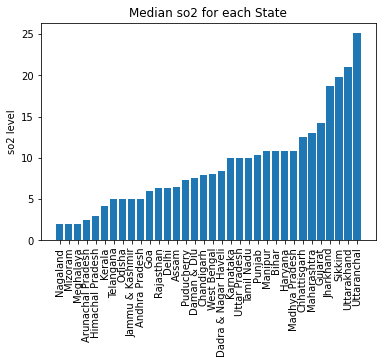

In [129]:
#(b) bar chart with matplotlib 

plt.bar(median_so2.index, median_so2)
plt.title("Median so2 for each State")
plt.xticks(rotation = 90)
plt.ylabel('so2 level')
plt.show()

### no2 status

In [130]:
#(a)
median_no2 = df.groupby('state')['no2'].median().sort_values() #sort values default true ascending 
display(median_no2) 

state
Arunachal Pradesh        5.000000
Mizoram                  5.000000
Nagaland                 7.000000
Meghalaya               10.000000
Goa                     11.600000
Puducherry              13.000000
Jammu & Kashmir         13.000000
Himachal Pradesh        13.900000
Kerala                  14.000000
Assam                   14.000000
Odisha                  16.000000
Daman & Diu             17.600000
Chandigarh              18.000000
Dadra & Nagar Haveli    18.000000
Madhya Pradesh          19.200000
Manipur                 19.800000
Andhra Pradesh          20.000000
Tamil Nadu              21.000000
Karnataka               21.200000
Chhattisgarh            21.500000
Telangana               22.000000
Haryana                 22.750000
Gujarat                 23.000000
Uttarakhand             25.809659
Rajasthan               26.000000
Sikkim                  26.800000
Uttar Pradesh           27.000000
Uttaranchal             27.500000
Punjab                  28.300000
Maharash

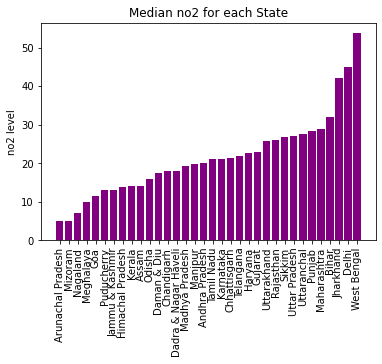

In [131]:
#(b) bar chart with matplotlib 

plt.bar(median_no2.index, median_no2,color='purple')
plt.title("Median no2 for each State")
plt.xticks(rotation = 90)
plt.ylabel('no2 level')
plt.show()

### rspm status

In [132]:
#(a)
median_rspm = df.groupby('state')['rspm'].median().sort_values() 
display(median_rspm) 

state
Sikkim                   32.000000
Mizoram                  40.000000
Puducherry               46.000000
Kerala                   49.000000
Goa                      56.000000
Meghalaya                57.000000
Tamil Nadu               59.000000
Manipur                  61.000000
Karnataka                63.000000
Arunachal Pradesh        74.500000
Andhra Pradesh           76.000000
Assam                    77.000000
Nagaland                 78.000000
Telangana                80.000000
Odisha                   81.000000
Himachal Pradesh         90.000000
Chandigarh               90.000000
Dadra & Nagar Haveli     91.000000
Gujarat                  95.000000
West Bengal              96.000000
Maharashtra              96.000000
Chhattisgarh            108.833091
Madhya Pradesh          108.833091
Bihar                   108.833091
Daman & Diu             108.833091
Uttaranchal             112.000000
Rajasthan               112.000000
Jammu & Kashmir         116.000000
Uttarakhand   

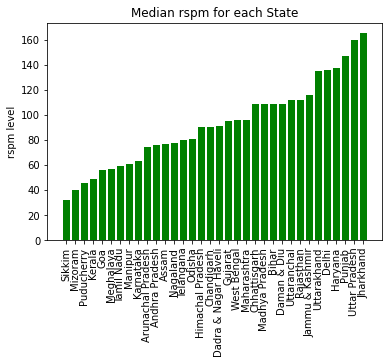

In [133]:
#(b) bar chart with matplotlib 

plt.bar(median_rspm.index, median_rspm,color='g')
plt.title("Median rspm for each State")
plt.xticks(rotation = 90)
plt.ylabel('rspm level')
plt.show()

### spm status

In [134]:
#(a)
median_spm = df.groupby('state')['spm'].median().sort_values() #sort values default true ascending 
display(median_spm) 

state
Sikkim                   75.00000
Manipur                 120.50000
Puducherry              191.00000
Goa                     199.00000
Daman & Diu             200.50000
Andhra Pradesh          220.78348
Meghalaya               220.78348
Mizoram                 220.78348
Nagaland                220.78348
Odisha                  220.78348
Punjab                  220.78348
Tamil Nadu              220.78348
Telangana               220.78348
Uttar Pradesh           220.78348
Uttarakhand             220.78348
Rajasthan               220.78348
Maharashtra             220.78348
Kerala                  220.78348
Karnataka               220.78348
Jharkhand               220.78348
Jammu & Kashmir         220.78348
Himachal Pradesh        220.78348
Haryana                 220.78348
Gujarat                 220.78348
Dadra & Nagar Haveli    220.78348
Chhattisgarh            220.78348
Chandigarh              220.78348
Bihar                   220.78348
Assam                   220.78348
Arunacha

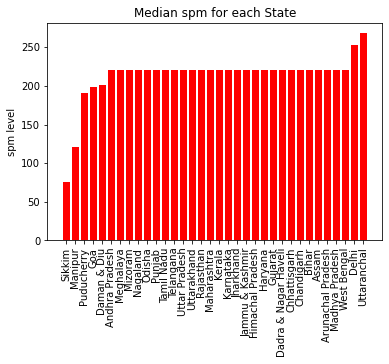

In [135]:
#(b) bar chart with matplotlib 

plt.bar(median_spm.index, median_spm,color='r')
plt.title("Median spm for each State")
plt.xticks(rotation = 90)
plt.ylabel('spm level')
plt.show()

### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [137]:

# specifying columns 
COLS = ['so2','no2','rspm','spm']

#slicing for specific state
ap_df = df.loc[df.state=='Andhra Pradesh',COLS].groupby(df.year).median()

ap_df.head(5)


,so2,no2,rspm,spm
year,,,,
1990,5.60,13.6,108.833091,179.00000
1991,8.25,12.8,108.833091,141.50000
1992,12.40,27.6,108.833091,192.00000
1993,6.00,11.4,108.833091,220.78348
1994,8.70,14.2,108.833091,220.78348


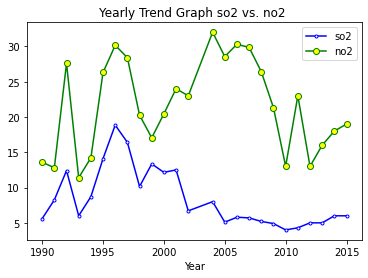

In [152]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 

plt.plot(ap_df.index,ap_df.so2, ls= '-',color='b',marker='.', markerfacecolor= 'white',label='so2')
plt.plot(ap_df.index,ap_df.no2, color='g', marker='o', markerfacecolor='yellow',label='no2')
plt.legend()
plt.title('Yearly Trend Graph so2 vs. no2 ')
plt.xlabel('Year')
plt.show()


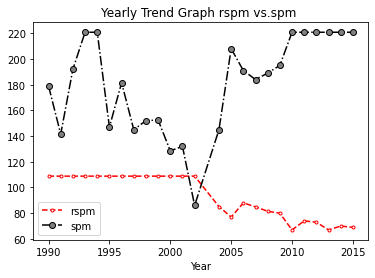

In [149]:
#(b) rspm and spm. 

plt.plot(ap_df.index,ap_df.rspm, ls= '--',color='red',marker='.', markerfacecolor= 'white',label='rspm')
plt.plot(ap_df.index,ap_df.spm, ls= '-.', color='black', marker='o', markerfacecolor='grey',label='spm')
plt.legend()
plt.title('Yearly Trend Graph rspm vs.spm ')
plt.xlabel('Year')
plt.show()

Do you find anythumg alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. Enter your answer here .....

The analysis shows that the state Uttaranchal has the highest SO2 content in India and Andhra Pradesh is located in the lower end. The state West Bengal has the highest NO2 levels which are often caused by burning of fossil fuels from vehicels amonst other things. 


The second graph showing the yearly trend of Suspended Particulate Matter (SPM-air quality) in the state Andhra Pradesh indicates that the air quality has been pretty bad until about 2002 where the level of SPM starts decreasing.This could be a good sign but the RSPM levels on the other hand have increased dramatically around the same time with fluctuations in the opposite direction. The RSPM levels stayed constantly high in the 21st century. 

According to a study by MIT the RSPM level (Respirable suspended particulate matter) causes mortalirty due to an increased risk of short along-term respiratory diseases caused by the polutants being emitted.

All in all, the air quality is pretty bad in India and the RSMP levels are alarmingly high.
The government or state officails need to come up with effective measures to counter those unhealthy emission. 




Source (MIT study): 
https://www.indiatoday.in/india/north/story/mit-study-high-rspm-in-delhi-air-pollution-138144-2011-07-24#:~:text=Suspended%20Particulate%20Matter%20(SPM)%20in,criteria%20to%20indicate%20air%20quality.&text=Respirable%20suspended%20particulate%20matter%20or,cancer%20in%20the%20long%20term.



